In [1]:
!git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose

Cloning into 'openpose'...
remote: Enumerating objects: 16100, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
^Cceiving objects:   5% (808/16100), 44.22 MiB | 91.00 KiB/s  


### AI허브에서 주거침입 데이터를 다운로드 

### 폴더구성

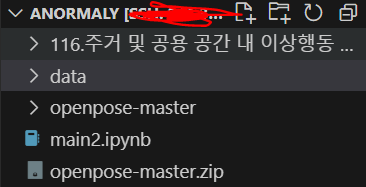

In [ ]:
%cd ./openpose-master/models/
!sh getModels.sh

In [ ]:
%cd ./Anormaly

# 1. 모델성능 가시화

In [26]:
import cv2
import matplotlib.pyplot as plt

# MPII에서 각 파트 번호, 선으로 연결될 POSE_PAIRS
BODY_PARTS = { "Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
                "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
                "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
                "Background": 15 }

POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
                ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
                ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
                ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]
    
# 각 파일 path
protoFile = "./openpose-master/models/pose/mpi/pose_deploy_linevec.prototxt"
weightsFile = "./openpose-master/models/pose/mpi/pose_iter_160000.caffemodel"



# 위의 path에 있는 network 불러오기
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)


이미지 ID :  44 , H :  84 , W :  89


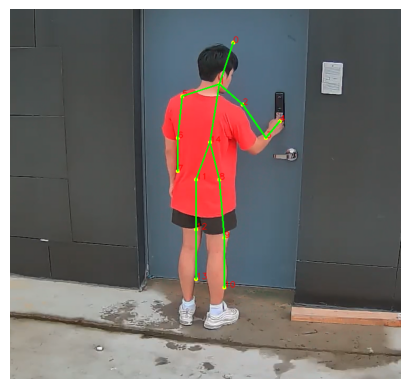

In [27]:
# 이미지 읽어오기
image = cv2.imread("./openpose-master/test.PNG")

# frame.shape = 불러온 이미지에서 height, width, color 받아옴
imageHeight, imageWidth, _ = image.shape
 
# network에 넣기위해 전처리
inpBlob = cv2.dnn.blobFromImage(image, 1.0 / 255, (imageWidth, imageHeight), (0, 0, 0), swapRB=False, crop=False)
 
# network에 넣어주기
net.setInput(inpBlob)

# 결과 받아오기
output = net.forward()

print("이미지 ID : ", len(output[0]), ", H : ", output.shape[2], ", W : ",output.shape[3]) # 이미지 ID

# 키포인트 검출시 이미지에 그려줌
points = []
for i in range(0,15):
    # 해당 신체부위 신뢰도 얻음.
    probMap = output[0, i, :, :]
 
    # global 최대값 찾기
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # 원래 이미지에 맞게 점 위치 변경
    x = (imageWidth * point[0]) / output.shape[2]
    y = (imageHeight * point[1]) / output.shape[3]

    # 키포인트 검출한 결과가 0.1보다 크면(검출한곳이 위 BODY_PARTS랑 맞는 부위면) points에 추가, 검출했는데 부위가 없으면 None으로    
    if prob > 0.1 :    
        cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)       # circle(그릴곳, 원의 중심, 반지름, 색)
        cv2.putText(image, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
        points.append((int(x), int(y)))
    else :
        points.append(None)
imageCopy = image

# POSE_PAIRS 선 그리기 
for pair in POSE_PAIRS:
    partA = pair[0]             # Head
    partA = BODY_PARTS[partA]   # 0
    partB = pair[1]             # Neck
    partB = BODY_PARTS[partB]   # 1
    
    #print(partA," 와 ", partB, " 연결\n")
    if points[partA] and points[partB]:
        cv2.line(imageCopy, points[partA], points[partB], (0, 255, 0), 2)
# Convert BGR image to RGB for plotting with matplotlib
imageCopyRGB = cv2.cvtColor(imageCopy, cv2.COLOR_BGR2RGB)

# Plot the image using matplotlib
plt.imshow(imageCopyRGB)
plt.axis('off')  # Remove axis
plt.show()

# 2. Data preprocessing

In [ ]:
# 이미지 읽어오기
image = cv2.imread("./openpose-master/test.PNG")

# frame.shape = 불러온 이미지에서 height, width, color 받아옴
imageHeight, imageWidth, _ = image.shape
 
# network에 넣기위해 전처리
inpBlob = cv2.dnn.blobFromImage(image, 1.0 / 255, (imageWidth, imageHeight), (0, 0, 0), swapRB=False, crop=False)
 
# network에 넣어주기
net.setInput(inpBlob)

# 결과 받아오기
output = net.forward()

print("이미지 ID : ", len(output[0]), ", H : ", output.shape[2], ", W : ",output.shape[3]) # 이미지 ID

# 키포인트 검출시 이미지에 그려줌
points = []
for i in range(0,15):
    # 해당 신체부위 신뢰도 얻음.
    probMap = output[0, i, :, :]
 
    # global 최대값 찾기
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # 원래 이미지에 맞게 점 위치 변경
    x = (imageWidth * point[0]) / output.shape[2]
    y = (imageHeight * point[1]) / output.shape[3]

    # 키포인트 검출한 결과가 0.1보다 크면(검출한곳이 위 BODY_PARTS랑 맞는 부위면) points에 추가, 검출했는데 부위가 없으면 None으로    
    if prob > 0.1 :    
        cv2.circle(image, (int(x), int(y)), 3, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)       # circle(그릴곳, 원의 중심, 반지름, 색)
        cv2.putText(image, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, lineType=cv2.LINE_AA)
        points.append((int(x), int(y)))
    else :
        points.append(None)
imageCopy = image

# POSE_PAIRS 선 그리기 
for pair in POSE_PAIRS:
    partA = pair[0]             # Head
    partA = BODY_PARTS[partA]   # 0
    partB = pair[1]             # Neck
    partB = BODY_PARTS[partB]   # 1
    
    #print(partA," 와 ", partB, " 연결\n")
    if points[partA] and points[partB]:
        cv2.line(imageCopy, points[partA], points[partB], (0, 255, 0), 2)
# Convert BGR image to RGB for plotting with matplotlib
imageCopyRGB = cv2.cvtColor(imageCopy, cv2.COLOR_BGR2RGB)

# Plot the image using matplotlib
plt.imshow(imageCopyRGB)
plt.axis('off')  # Remove axis
plt.show()

In [106]:
import os
data = os.listdir("data/train")
label = os.listdir("data/label")

In [107]:
import json

feature1x = []
feature1y = []
feature2x = []
feature2y = []
feature3x = []
feature3y = []
feature4x = []
feature4y = []
feature5x = []
feature5y = []
feature6x = []
feature6y = []
feature7x = []
feature7y = []
feature8x = []
feature8y = []
feature9x = []
feature9y = []
feature10x = []
feature10y = []
feature11x = []
feature11y = []
feature12x = []
feature12y = []
feature13x = []
feature13y = []
feature14x = []
feature14y = []
feature15x = []
feature15y = []

fname = []
labels = []
frame_no = []

#for file_no in range(0,len(label)):
for file_no in range(0,10):    
    # JSON 파일 열기
    with open("./data/label/"+label[file_no]) as json_file:
        # JSON 데이터 로드
        label_one = json.load(json_file)
    index_list = []
    bowl= dict
    for i in label_one['file'][0]['videos']['block_information']:
        if i['num_persons'] == '1':
            index_list.append([int(i['start_frame_index']), int(i['end_frame_index']), i['block_type']])

    # mp4 파일 열기
    cap = cv2.VideoCapture(f'./data/train/{label[file_no][:-5]}.mp4')

    while True:
        # 프레임 읽기
        ret, frame = cap.read()
        frame_number = cap.get(cv2.CAP_PROP_POS_FRAMES)
        # 프레임이 제대로 읽히지 않은 경우 종료
        if not ret:
            break
        if int(frame_number-1) % 15 == 0:
            num = frame_number-1
            print("현재 프레임 넘버:", frame_number-1)
            if index_list[0][0]<= num <= index_list[0][1]: 
                sym_label=index_list[0][2]
            elif index_list[1][0]<= num <= index_list[1][1]:
                sym_label=index_list[1][2]
            else:
                sym_label=index_list[2][2]
                
            # frame.shape = 불러온 이미지에서 height, width, color 받아옴
            imageHeight, imageWidth, _ = frame.shape
            # network에 넣기위해 전처리
            inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (imageWidth, imageHeight), (0, 0, 0), swapRB=False, crop=False)
            # network에 넣어주기
            net.setInput(inpBlob)
            # 결과 받아오기
            output = net.forward()
            # 키포인트 검출시 이미지에 그려줌
            points = []
            for i in range(0,15):
                # 해당 신체부위 신뢰도 얻음.
                probMap = output[0, i, :, :]
            
                # global 최대값 찾기
                minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

                # 원래 이미지에 맞게 점 위치 변경
                x = (imageWidth * point[0]) / output.shape[2]
                y = (imageHeight * point[1]) / output.shape[3]

                # 키포인트 검출한 결과가 0.1보다 크면(검출한 곳이 위 BODY_PARTS랑 맞는 부위면) points에 추가, 검출했는데 부위가 없으면 None으로    
                if prob > 0.1 :    
                    points.append((int(x), int(y)))
                else:
                    points.append([None,None])

            frame_no.append(num)
            fname.append(f'./data/train/{label[0][:-5]}.mp4')
            labels.append(sym_label)
            feature1x.append(points[0][0])
            feature1y.append(points[0][1])
            feature2x.append(points[1][0]) 
            feature2y.append(points[1][1]) 
            feature3x.append(points[2][0])
            feature3y.append(points[2][1])
            feature4x.append(points[3][0])
            feature4y.append(points[3][1])
            feature5x.append(points[4][0])
            feature5y.append(points[4][1])
            feature6x.append(points[5][0])
            feature6y.append(points[5][1])
            feature7x.append(points[6][0])
            feature7y.append(points[6][1])
            feature8x.append(points[7][0])
            feature8y.append(points[7][1])
            feature9x.append(points[8][0])
            feature9y.append(points[8][1])
            feature10x.append(points[9][0])
            feature10y.append(points[9][1])
            feature11x.append(points[10][0])
            feature11y.append(points[10][1])
            feature12x.append(points[11][0])
            feature12y.append(points[11][1])
            feature13x.append(points[12][0])
            feature13y.append(points[12][1])
            feature14x.append(points[13][0])
            feature14y.append(points[13][1])
            feature15x.append(points[14][0])
            feature15y.append(points[14][1])


현재 프레임 넘버: 0.0
현재 프레임 넘버: 15.0
현재 프레임 넘버: 30.0
현재 프레임 넘버: 45.0
현재 프레임 넘버: 60.0
현재 프레임 넘버: 75.0
현재 프레임 넘버: 90.0
현재 프레임 넘버: 105.0
현재 프레임 넘버: 120.0
현재 프레임 넘버: 135.0
현재 프레임 넘버: 150.0
현재 프레임 넘버: 165.0
현재 프레임 넘버: 180.0
현재 프레임 넘버: 195.0
현재 프레임 넘버: 210.0
현재 프레임 넘버: 225.0
현재 프레임 넘버: 240.0
현재 프레임 넘버: 255.0
현재 프레임 넘버: 270.0
현재 프레임 넘버: 285.0
현재 프레임 넘버: 300.0
현재 프레임 넘버: 315.0
현재 프레임 넘버: 330.0
현재 프레임 넘버: 345.0
현재 프레임 넘버: 360.0
현재 프레임 넘버: 375.0
현재 프레임 넘버: 390.0
현재 프레임 넘버: 405.0
현재 프레임 넘버: 420.0
현재 프레임 넘버: 435.0
현재 프레임 넘버: 450.0
현재 프레임 넘버: 465.0
현재 프레임 넘버: 480.0
현재 프레임 넘버: 495.0
현재 프레임 넘버: 510.0
현재 프레임 넘버: 525.0
현재 프레임 넘버: 540.0
현재 프레임 넘버: 555.0
현재 프레임 넘버: 570.0
현재 프레임 넘버: 585.0
현재 프레임 넘버: 600.0
현재 프레임 넘버: 615.0
현재 프레임 넘버: 630.0
현재 프레임 넘버: 645.0
현재 프레임 넘버: 660.0
현재 프레임 넘버: 675.0
현재 프레임 넘버: 690.0
현재 프레임 넘버: 705.0
현재 프레임 넘버: 720.0
현재 프레임 넘버: 735.0
현재 프레임 넘버: 750.0
현재 프레임 넘버: 765.0
현재 프레임 넘버: 780.0
현재 프레임 넘버: 795.0
현재 프레임 넘버: 810.0
현재 프레임 넘버: 825.0
현재 프레임 넘버: 840.0
현재 프레임 넘버: 855.0
현재 프레임 넘버: 870.0
현재 프레

In [104]:
import pandas as pd 
f = pd.DataFrame({"fname": fname,
              "frame_no":frame_no,
              "x1": feature1x,
              "y1": feature1y,
              "x2": feature2x,
              "y2": feature2y,
              "x3":  feature3x,
              "y3":  feature3y,
              "x4":  feature4x,
              "y4":  feature4y,
              "x5":  feature5x,
              "y5":  feature5y,
              "x6":  feature6x,
              "y6":  feature6y,
              "x7":  feature7x,
              "y7":  feature7y,
              "x8":  feature8x,
              "y8":  feature8y,
              "x9":  feature9x,
              "y9":  feature9y,
              "x10":  feature10x,
              "y10":  feature10y,
              "x11":  feature11x,
              "y11":  feature11y,
              "x12":  feature12x,
              "y12":  feature12y,
              "x13":  feature13x,
              "y13":  feature13y,
              "x14":  feature14x,
              "y14":  feature14y,
              "x15":  feature15x,
              "y15":  feature15y,
              'label': labels})
f.to_csv("./train_data.csv",index=False)

In [ ]:

# mp4 파일 열기
cap = cv2.VideoCapture(f'./data/train/{label[0][:-5]}.mp4')

while True:
    # 프레임 읽기
    ret, frame = cap.read()
    frame_number = cap.get(cv2.CAP_PROP_POS_FRAMES)
    print("현재 프레임 넘버:", frame_number-1)
    num = frame_number-1

    if index_list[0][0]<= num <= index_list[0][1]: 
        sym_label=index_list[0][2]
    elif index_list[1][0]<= num <= index_list[1][1]:
        sym_label=index_list[1][2]
    else:
        sym_label=index_list[2][2]
        
    # 프레임이 제대로 읽히지 않은 경우 종료
    if not ret:
        break
    # frame.shape = 불러온 이미지에서 height, width, color 받아옴
    imageHeight, imageWidth, _ = frame.shape
    # network에 넣기위해 전처리
    inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (imageWidth, imageHeight), (0, 0, 0), swapRB=False, crop=False)
    # network에 넣어주기
    net.setInput(inpBlob)
    # 결과 받아오기
    output = net.forward()
    print("이미지 ID : ", len(output[0]), ", H : ", output.shape[2], ", W : ",output.shape[3]) # 이미지 ID
    # 키포인트 검출시 이미지에 그려줌
    points = []
    for i in range(0,15):
        # 해당 신체부위 신뢰도 얻음.
        probMap = output[0, i, :, :]
     
        # global 최대값 찾기
        minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

        # 원래 이미지에 맞게 점 위치 변경
        x = (imageWidth * point[0]) / output.shape[2]
        y = (imageHeight * point[1]) / output.shape[3]

        # 키포인트 검출한 결과가 0.1보다 크면(검출한 곳이 위 BODY_PARTS랑 맞는 부위면) points에 추가, 검출했는데 부위가 없으면 None으로    
        if prob > 0.1 :    
            points.append((int(x), int(y)))
        else:
            points.append(None)

    frame_no.append(num)
    fname.append(f'./data/train/{label[0][:-5]}.mp4')
    labels.append(sym_label)
    feature1.append(points[0])
    feature2.append(points[1]) 
    feature3.append(points[2])
    feature4.append(points[3])
    feature5.append(points[4])
    feature6.append(points[5])
    feature7.append(points[6])
    feature8.append(points[7])
    feature9.append(points[8])
    feature10.append(points[9])
    feature11.append(points[10])
    feature12.append(points[11])
    feature13.append(points[12])
    feature14.append(points[13])
    feature15.append(points[14])
